In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '/Users/cdelacroix/Desktop/improved_focus'
files = ['20230725_155205.fits',
         '20230725_155230.fits',
         '20230725_155837.fits',
         '20230725_155901.fits',
         '20230725_160700.fits',
         '20230725_160721.fits']
xoyo = (75, 75)
xmax = 50
part = '001'
nimg = 130
nan_floor = 300

In [3]:
y = np.empty((len(files),xmax))
dataset = np.empty((len(files),nimg,nimg))
for i,file in enumerate(files):
    dataset[i] = np.flipud(fits.getdata(folder + '/' + file)) # image is flipped vertically in the lab
    dataset[i][dataset[i] < nan_floor] = np.nan

In [13]:
def select_square(X0, Y0, R1=15, R2=0):
    X, Y = np.meshgrid(np.arange(nimg),np.arange(nimg))
    dX, dY = np.abs(X-X0), np.abs(Y-Y0)
    return (dX < R1) * (dY < R1) * ~((dX < R2) * (dY < R2))

def get_medians(data, X0, Y0, mag=0.8, figsize=(8,6)):
    fig, axs = plt.subplot_mosaic("AB;CC", figsize=figsize)
    mask_in = select_square(X0,Y0,R1=7,R2=0)
    axs['A'].imshow(data*(1 + mask_in*mag), origin='lower');
    med_in = np.nanmedian(data[mask_in])
    avg_in = np.nanmean(data[mask_in])
    mask_out = select_square(X0,Y0,R1=14,R2=10)
    axs['B'].imshow(data*(1 + mask_out*mag), origin='lower');
    med_out = np.nanmedian(data[mask_out])
    avg_out = np.nanmean(data[mask_out])
    mask_all = select_square(X0,Y0,R1=15,R2=0)
    axs['C'].hist(data[mask_all],bins=100,range=(300,700))
    T = med_in / med_out
    fig.suptitle('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
          %(i,j,med_in, avg_in, med_out, avg_out, T))
    return med_in, med_out, avg_in, avg_out, T


## Chrome thickness 100nm

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


(0,0); in(median;mean)=nan;nan out(median;mean)=nan;nan transmittance=nan
(1,0); in(median;mean)=387.68;379.26 out(median;mean)=636.09;637.23 transmittance=0.6095
(2,0); in(median;mean)=346.95;363.11 out(median;mean)=628.92;637.11 transmittance=0.5517
(3,0); in(median;mean)=366.89;377.73 out(median;mean)=635.37;643.73 transmittance=0.5774
(4,0); in(median;mean)=nan;nan out(median;mean)=674.33;647.21 transmittance=nan
(0,1); in(median;mean)=465.73;447.43 out(median;mean)=620.10;624.93 transmittance=0.7510
(1,1); in(median;mean)=347.30;347.75 out(median;mean)=620.35;618.75 transmittance=0.5598
(2,1); in(median;mean)=350.51;349.21 out(median;mean)=620.30;620.19 transmittance=0.5651
(3,1); in(median;mean)=340.46;339.94 out(median;mean)=622.59;622.14 transmittance=0.5468
(4,1); in(median;mean)=361.59;359.80 out(median;mean)=609.21;622.18 transmittance=0.5935
(0,2); in(median;mean)=438.86;437.20 out(median;mean)=614.47;628.70 transmittance=0.7142
(1,2); in(median;mean)=365.67;365.85 out(medi

/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


(0,4); in(median;mean)=nan;nan out(median;mean)=565.35;533.59 transmittance=nan
(1,4); in(median;mean)=362.62;370.34 out(median;mean)=605.42;597.33 transmittance=0.5990
(2,4); in(median;mean)=383.33;384.66 out(median;mean)=591.57;587.61 transmittance=0.6480
(3,4); in(median;mean)=356.39;358.76 out(median;mean)=591.03;586.45 transmittance=0.6030
(4,4); in(median;mean)=nan;nan out(median;mean)=574.12;570.61 transmittance=nan


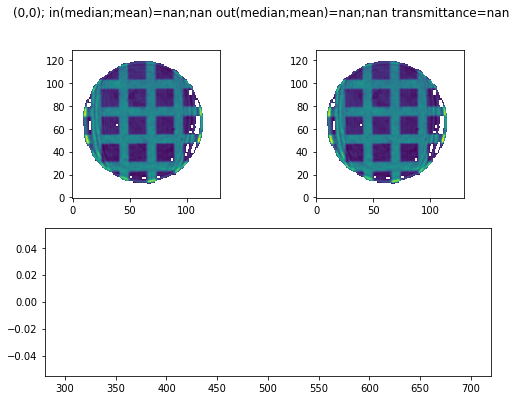

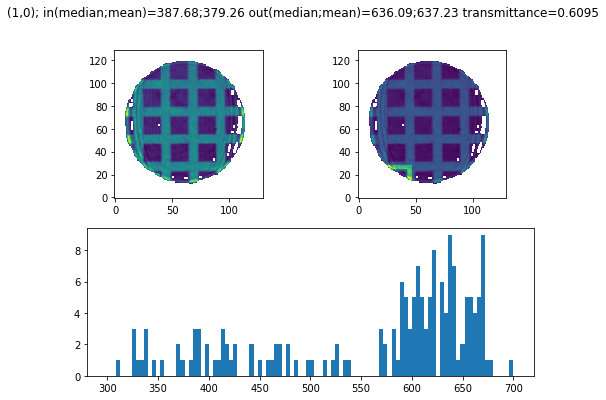

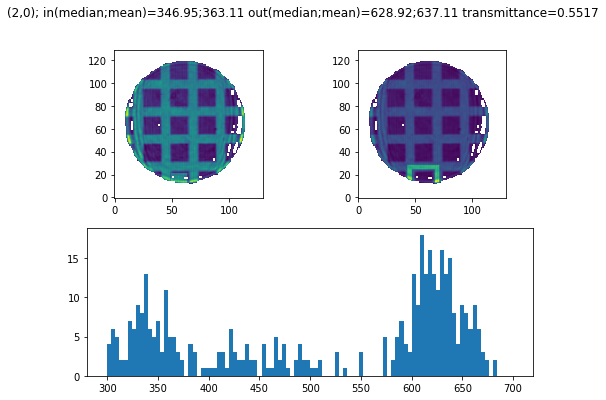

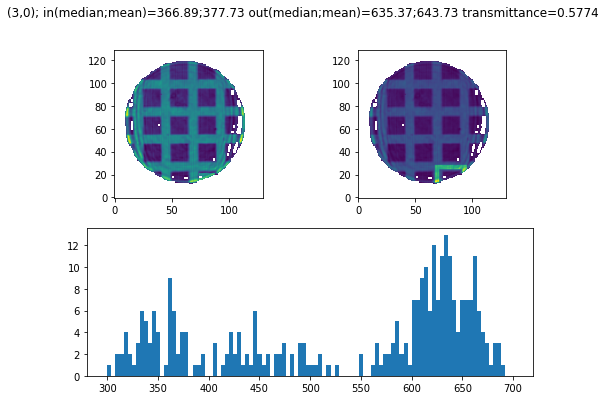

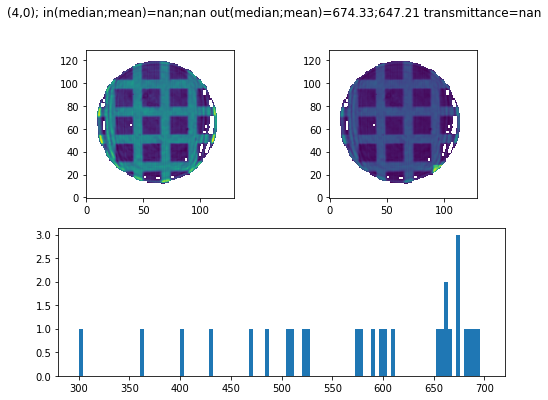

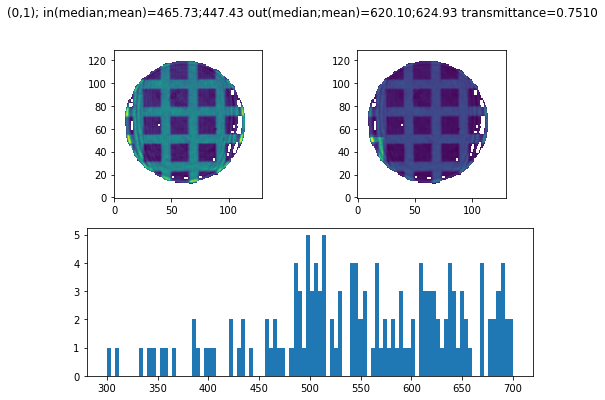

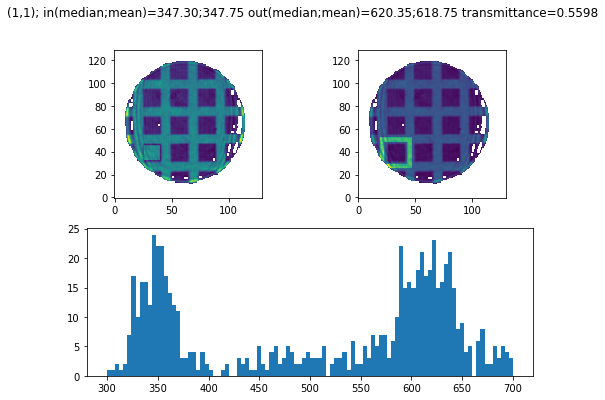

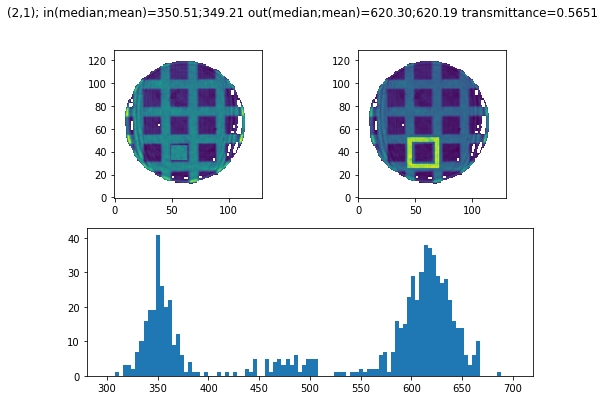

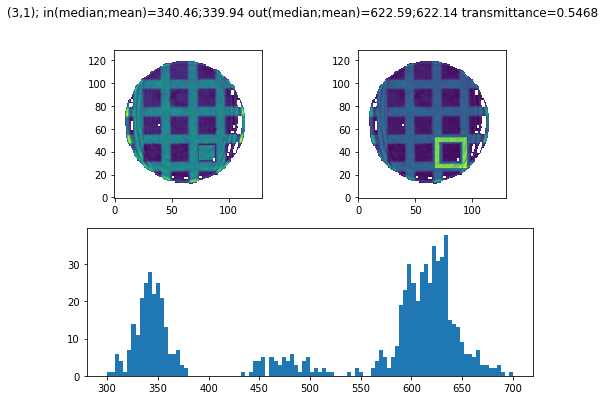

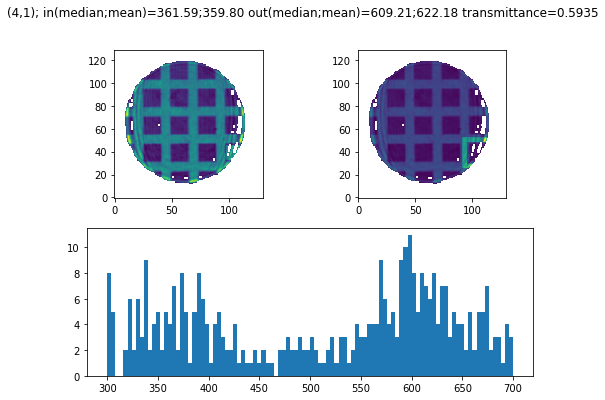

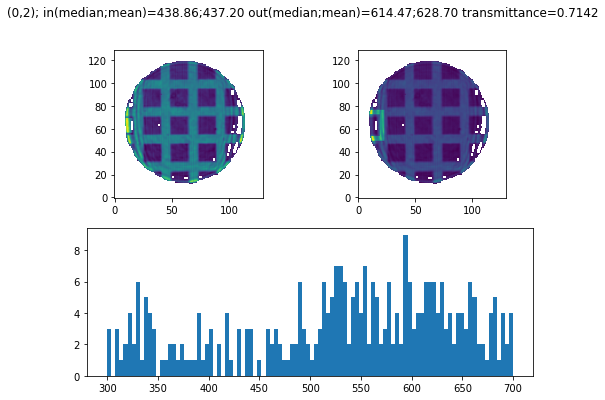

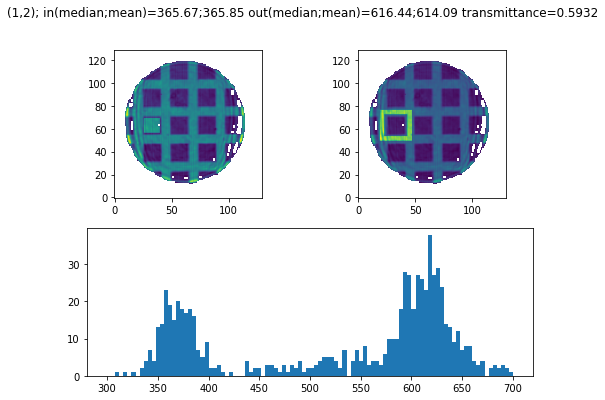

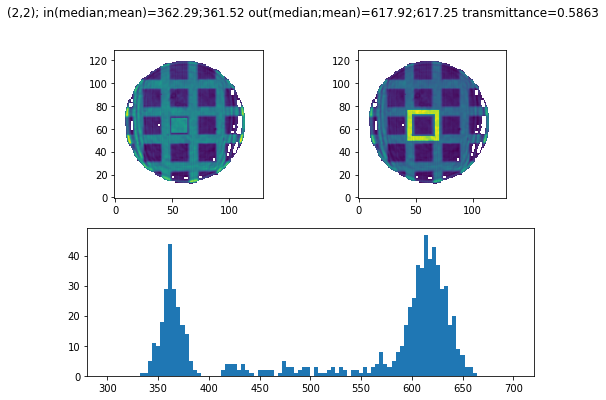

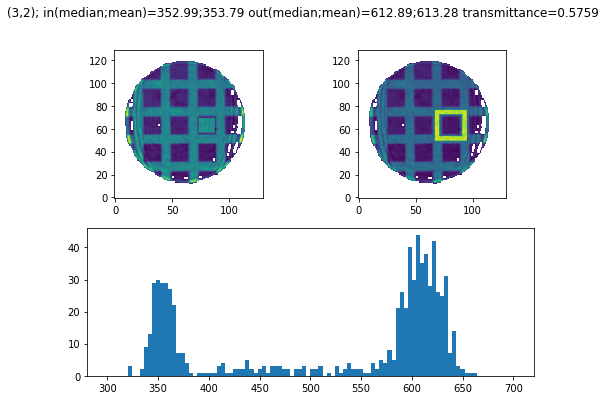

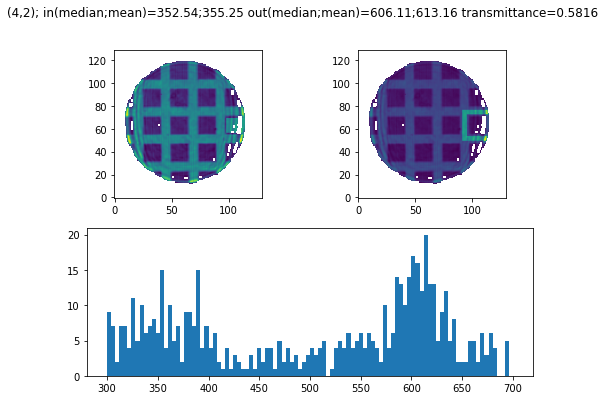

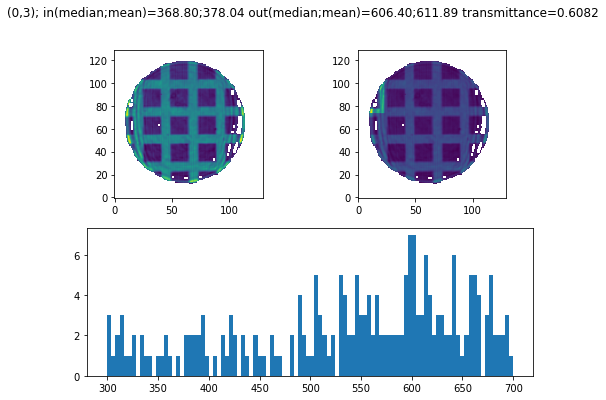

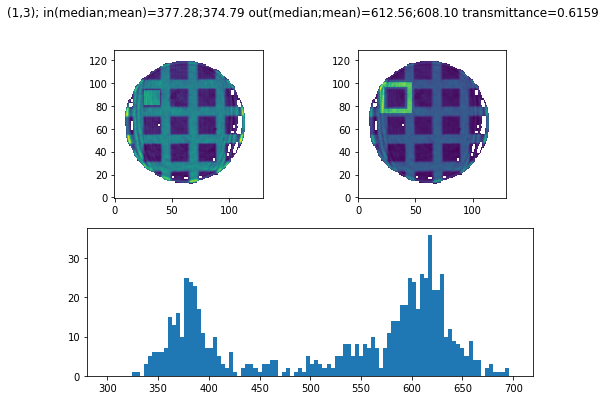

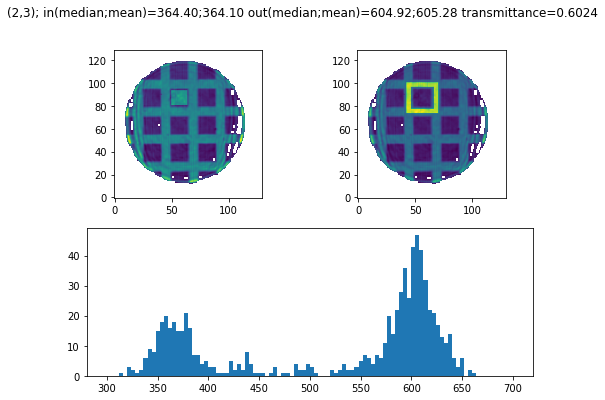

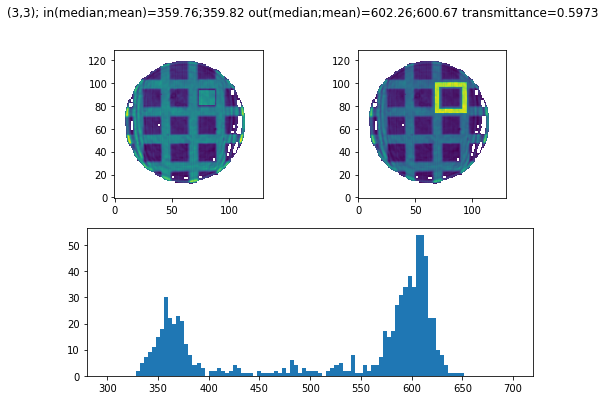

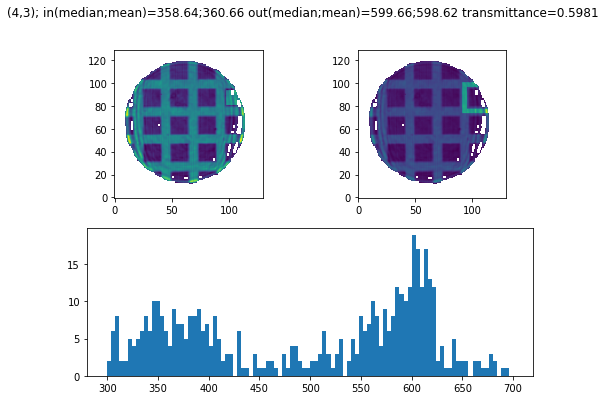

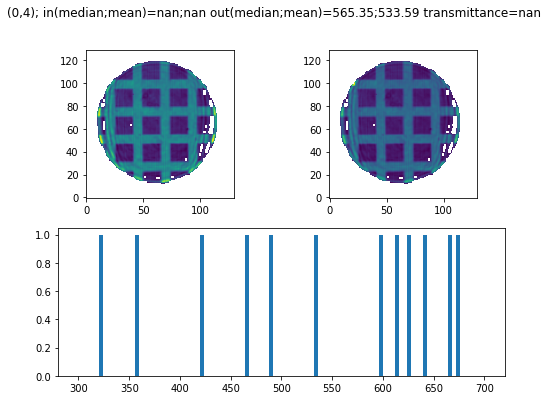

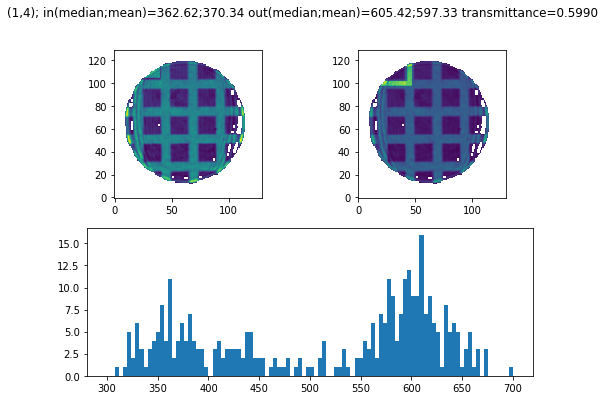

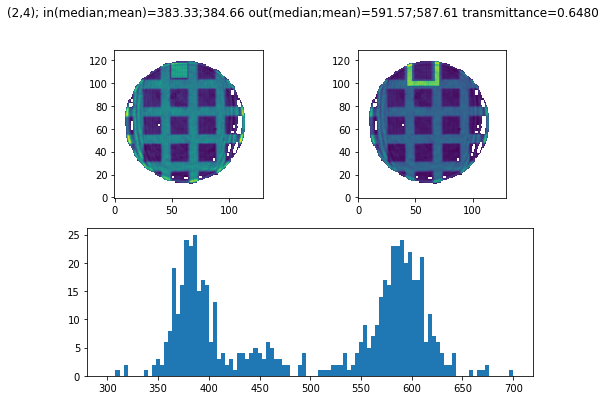

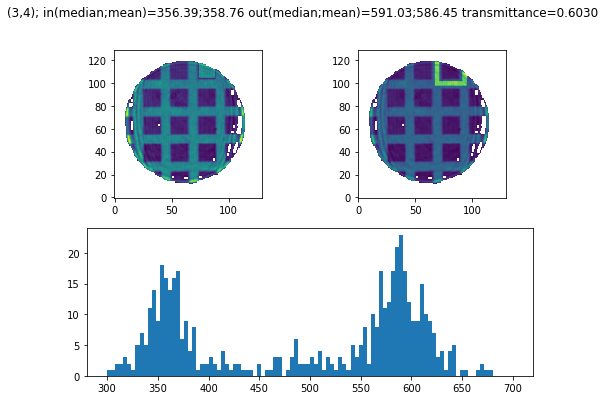

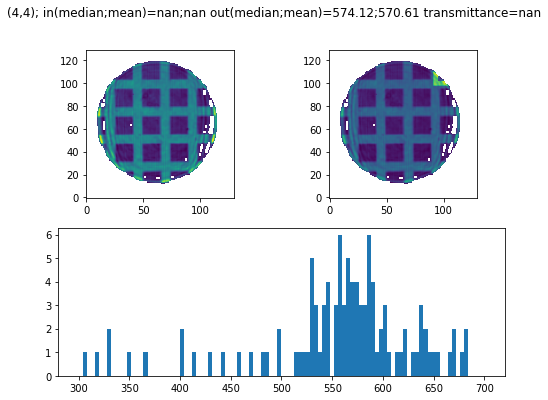

In [22]:
data = dataset[5]
Ts = np.empty((5,5))
X0s = np.arange(8.7,120,24)
Y0s = np.arange(15.,130,24)
for j,Y0 in enumerate(Y0s):
    for i,X0 in enumerate(X0s):
        med_in, med_out, avg_in, avg_out, T = get_medians(data,X0,Y0)
        Ts[i,j] = T
        print('(%s,%s); in(median;mean)=%.2f;%.2f out(median;mean)=%.2f;%.2f transmittance=%.4f'
            %(i,j,med_in, avg_in, med_out, avg_out, T))

In [18]:
Ts

array([[       nan, 0.73516592, 0.67875766, 0.63043442,        nan],
       [0.62197174, 0.56014187, 0.59742523, 0.61754545, 0.60939757],
       [0.55399255, 0.56411442, 0.58777032, 0.60482598, 0.65179645],
       [0.57811192, 0.54974708, 0.57747959, 0.59993351, 0.6054289 ],
       [       nan, 0.59131538, 0.58555769, 0.59342286,        nan]])